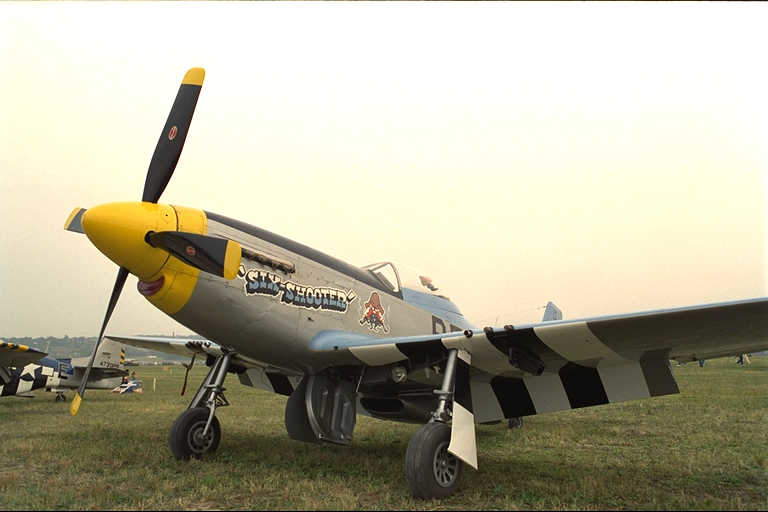

In [6]:
import os
import JPEGAndEntropyEncoding
import numpy as np
from PIL import Image

images = []
for file_name in os.listdir("Kodak"):
    images.append(Image.open("Kodak/" + file_name))
images[0]

def compress_and_decompress_image(im,qf,subsampling = "Down444"):
    im = np.array(im)
    res = JPEGAndEntropyEncoding.JPEGcompress_and_decompress(im,qf,subsampling)
    return Image.fromarray(np.array(res,dtype=np.uint8))



In [24]:
for f in sorted(os.listdir("Kodak")):
    image = Image.open("Kodak/" + f)
    name = f[:-4]
    p = name + "/"
    os.mkdir(p)
    for qf in [50, 20, 5, 1]:
        im = compress_and_decompress_image(image,qf)
        JPEGAndEntropyEncoding.JPEG_compress_to_file(np.array(image),qf,"Down444","temp")
        s = os.stat("temp").st_size
        rate = "{:03d}".format(int(s / (512 * 768 * 3) * 10000))
        file_name = p + name + "qf_" + str(qf) + "_rate_" + rate[0] + "_" + rate[1:] + ".png"
        im.save(file_name,"PNG")
